In [ ]:
#글꼴 깨짐 방지

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

##Library

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew,shapiro,probplot,wilcoxon,pearsonr,ttest_rel

##코로나 이전(2019년 이전)과 코로나 이후(2020년 이후) 유동인구와 매출액 비교

##1.Load data

In [2]:
pop_data = pd.read_csv('/content/drive/MyDrive/Problem/서울시 우리마을가게 상권분석서비스(상권배후지-생활인구).csv',encoding='cp949')

money_data2018 = pd.read_csv('/content/drive/MyDrive/Problem/2018년_우리마을가게_상권서비스_상권배후지-추정매출.csv',encoding='cp949')
money_data2019 = pd.read_csv('/content/drive/MyDrive/Problem/2019년_우리마을가게_상권서비스_상권배후지-추정매출.csv',encoding='cp949')
money_data2020 = pd.read_csv('/content/drive/MyDrive/Problem/2020년_우리마을가게_상권서비스_상권배후지-추정매출.csv',encoding='cp949')
money_data2021 = pd.read_csv('/content/drive/MyDrive/Problem/2021년_우리마을가게_상권서비스_상권배후지-추정매출.csv',encoding='cp949')

##2.Explore data, statistics, null data etc.

##2-1)유동인구

In [3]:
print(pop_data.head().T)

                                   0        1        2        3        4
기준_년_코드                         2021     2021     2021     2021     2021
기준_분기_코드                           4        4        4        4        4
상권_구분_코드                           A        A        A        A        A
상권_구분_코드_명                      골목상권     골목상권     골목상권     골목상권     골목상권
상권_코드                        1001010  1001009  1001008  1001007  1001006
...                              ...      ...      ...      ...      ...
여성연령대_60_이상_일요일시간대_2_생활인구_수    41794    37161    29222     5711    27809
여성연령대_60_이상_일요일시간대_3_생활인구_수    22951    21984    18415     3102    16445
여성연령대_60_이상_일요일시간대_4_생활인구_수    22630    21981    18678     2947    16957
여성연령대_60_이상_일요일시간대_5_생활인구_수    32572    31001    25396     4061    23310
여성연령대_60_이상_일요일시간대_6_생활인구_수    25980    23334    18362     3482    17307

[532 rows x 5 columns]


In [4]:
print(pop_data.shape) #16160행,523열

(16160, 532)


In [5]:
print(pop_data.columns)

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수', '연령대_10_생활인구_수',
       ...
       '여성연령대_60_이상_토요일시간대_3_생활인구_수', '여성연령대_60_이상_토요일시간대_4_생활인구_수',
       '여성연령대_60_이상_토요일시간대_5_생활인구_수', '여성연령대_60_이상_토요일시간대_6_생활인구_수',
       '여성연령대_60_이상_일요일시간대_1_생활인구_수', '여성연령대_60_이상_일요일시간대_2_생활인구_수',
       '여성연령대_60_이상_일요일시간대_3_생활인구_수', '여성연령대_60_이상_일요일시간대_4_생활인구_수',
       '여성연령대_60_이상_일요일시간대_5_생활인구_수', '여성연령대_60_이상_일요일시간대_6_생활인구_수'],
      dtype='object', length=532)


In [6]:
print(pop_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16160 entries, 0 to 16159
Columns: 532 entries, 기준_년_코드 to 여성연령대_60_이상_일요일시간대_6_생활인구_수
dtypes: int64(529), object(3)
memory usage: 65.6+ MB
None


In [7]:
print(pop_data.isnull().sum())

기준_년_코드                        0
기준_분기_코드                       0
상권_구분_코드                       0
상권_구분_코드_명                     0
상권_코드                          0
                              ..
여성연령대_60_이상_일요일시간대_2_생활인구_수    0
여성연령대_60_이상_일요일시간대_3_생활인구_수    0
여성연령대_60_이상_일요일시간대_4_생활인구_수    0
여성연령대_60_이상_일요일시간대_5_생활인구_수    0
여성연령대_60_이상_일요일시간대_6_생활인구_수    0
Length: 532, dtype: int64


In [8]:
print(sum(list(pop_data.isnull().sum())))

0


##2-2)매출액

In [9]:
print(money_data2018.head().T)

                       0        1        2        3        4
기준_년_코드             2018     2018     2018     2018     2018
기준_분기_코드               1        1        1        1        1
상권_구분_코드               A        A        A        A        A
상권_구분_코드_명          골목상권     골목상권     골목상권     골목상권     골목상권
상권_코드            1000629  1000726  1000628  1000830  1000610
...                  ...      ...      ...      ...      ...
연령대_30_매출_건수         449    45547      661     3333      444
연령대_40_매출_건수         368    27565     1004     6032     1024
연령대_50_매출_건수         259    13269      909     2430     1429
연령대_60_이상_매출_건수       82     6272      344     1379      635
점포수                   11       49        8        8        4

[80 rows x 5 columns]


In [10]:
print(money_data2019.head().T)

                       0        1        2        3        4
기준_년_코드             2019     2019     2019     2019     2019
기준_분기_코드               1        1        1        1        1
상권_구분_코드               A        A        A        A        A
상권_구분_코드_명          골목상권     골목상권     골목상권     골목상권     골목상권
상권_코드            1000365  1000067  1000206  1000029  1000379
...                  ...      ...      ...      ...      ...
연령대_30_매출_건수         337     7736     4773     3935      496
연령대_40_매출_건수         420     6489     8301    13852      528
연령대_50_매출_건수         336     5041     9009     8122      394
연령대_60_이상_매출_건수      134     1649    11741     3983      263
점포수                    3       10       13       85       10

[80 rows x 5 columns]


In [11]:
print(money_data2020.head().T)

                       0        1        2        3        4
기준_년_코드             2020     2020     2020     2020     2020
기준_분기_코드               3        1        3        3        3
상권_구분_코드               A        A        A        A        A
상권_구분_코드_명          골목상권     골목상권     골목상권     골목상권     골목상권
상권_코드            1000361  1000021  1000365  1000366  1000367
...                  ...      ...      ...      ...      ...
연령대_30_매출_건수           0    11495        0        0        0
연령대_40_매출_건수           0    16166        0       69       22
연령대_50_매출_건수           0    14909       15        0        0
연령대_60_이상_매출_건수       19    14915       10        0       22
점포수                    6       14        1        1        1

[80 rows x 5 columns]


In [12]:
print(money_data2021.head().T)

                       0        1        2        3        4
기준_년_코드             2021     2021     2021     2021     2021
기준_분기_코드               4        4        4        4        4
상권_구분_코드               A        A        A        A        A
상권_구분_코드_명          골목상권     골목상권     골목상권     골목상권     골목상권
상권_코드            1001010  1001010  1001010  1001010  1001010
...                  ...      ...      ...      ...      ...
연령대_30_매출_건수           0     5664      818     2072        0
연령대_40_매출_건수           5     4279      168     4610       47
연령대_50_매출_건수           0     3387      483     6883       12
연령대_60_이상_매출_건수        0     7932     2008     5264        0
점포수                   30       14       25       20        3

[80 rows x 5 columns]


In [14]:
print(money_data2018.shape,money_data2019.shape,money_data2020.shape,money_data2021.shape)

(227924, 80) (195692, 80) (191658, 80) (188982, 80)


In [13]:
print(sum(list(money_data2018.isnull().sum())),sum(list(money_data2019.isnull().sum())),sum(list(money_data2020.isnull().sum())),sum(list(money_data2021.isnull().sum())))

0 0 0 0


##2-3) 고유한 골목상권의 수

In [15]:
len(money_data2021['상권_코드'].unique())

1010

In [16]:
money_data2021[money_data2021['상권_코드']==1001010].iloc[:,:9]

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액
0,2021,4,A,골목상권,1001010,풍성로37가길,CS300043,전자상거래업,1769130
1,2021,4,A,골목상권,1001010,풍성로37가길,CS300036,조명용품,738933587
2,2021,4,A,골목상권,1001010,풍성로37가길,CS300035,인테리어,186270809
3,2021,4,A,골목상권,1001010,풍성로37가길,CS300033,철물점,985734875
4,2021,4,A,골목상권,1001010,풍성로37가길,CS300032,가전제품,32804419
...,...,...,...,...,...,...,...,...,...
141607,2021,1,A,골목상권,1001010,풍성로37가길,CS100005,제과점,167911371
141608,2021,1,A,골목상권,1001010,풍성로37가길,CS100004,양식음식점,30463162
141609,2021,1,A,골목상권,1001010,풍성로37가길,CS100003,일식음식점,193832972
141610,2021,1,A,골목상권,1001010,풍성로37가길,CS100002,중식음식점,366683300


In [17]:
len(pop_data['상권_코드'].unique())

1010

In [18]:
pop_data[pop_data['상권_코드']==1001010].iloc[:,:7]

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수
0,2021,4,A,골목상권,1001010,풍성로37가길,9354201
1010,2021,3,A,골목상권,1001010,풍성로37가길,9348991
2020,2021,2,A,골목상권,1001010,풍성로37가길,9380791
3030,2021,1,A,골목상권,1001010,풍성로37가길,9759687
4040,2020,4,A,골목상권,1001010,풍성로37가길,9692443
5050,2020,3,A,골목상권,1001010,풍성로37가길,9471987
6060,2020,2,A,골목상권,1001010,풍성로37가길,9613906
7070,2020,1,A,골목상권,1001010,풍성로37가길,9706419
8080,2019,4,A,골목상권,1001010,풍성로37가길,9487913
9090,2019,3,A,골목상권,1001010,풍성로37가길,9986533


##2-4) 1010개 골목상권의 연도별 생활인구 구하기

In [19]:
#총_생활인구_수 이후 필요없는 변수 제거

pop_data_total = pop_data.iloc[:,:7] 

In [20]:
pop_data_total.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수
0,2021,4,A,골목상권,1001010,풍성로37가길,9354201
1,2021,4,A,골목상권,1001009,천호옛길,8390603
2,2021,4,A,골목상권,1001008,천호옛14길,6801241
3,2021,4,A,골목상권,1001007,천호대로219길,1305800
4,2021,4,A,골목상권,1001006,천호대로197길,5792243


In [21]:
#pop_data_total.groupby(['기준_년_코드','상권_코드_명','상권_코드'])['총_생활인구_수'].sum() #series로 구하기

#연을 기준으로, 상권코드를 기준으로 groupby를 하고 총 생활 인구 수를 sum하여 구하기

pop_data_total.groupby(['기준_년_코드','상권_코드_명','상권_코드'])[['총_생활인구_수']].sum()

총_생활인구_수
기준_년_코드 상권_코드_명   상권_코드            
2018    가로공원로58길  1000507   1065479
        가로공원로76가길 1000552   5794806
        가로공원로80길  1000553   3865888
        가마산로61길   1000683   6096160
        가산로3길     1000654   2811903
...                             ...
2021    휘경로23길    1000219  20154615
        휘경로2길     1000220  18070983
        휘경로3길     1000221  22694861
        흑석로13길    1000778   8527397
        흑석로9길     1000779   8734304

[4040 rows x 1 columns]

In [22]:
#상권_코드 기준으로 sorting함 

pop_data_total.groupby(['기준_년_코드','상권_코드_명','상권_코드'])[['총_생활인구_수']].sum().sort_values(['상권_코드'])

,,,총_생활인구_수
기준_년_코드,상권_코드_명,상권_코드,
2020,계동길,1000001,4518075
2021,계동길,1000001,4267762
2019,계동길,1000001,5396727
2018,계동길,1000001,2517950
2019,난계로27길,1000002,15683106
...,...,...,...
2018,천호옛길,1001009,11787651
2019,풍성로37가길,1001010,39778747
2020,풍성로37가길,1001010,38484755


In [23]:
pop_data_comp = pop_data_total.groupby(['기준_년_코드','상권_코드_명','상권_코드'])[['총_생활인구_수']].sum().sort_values(['상권_코드'])

In [24]:
pop_data_comp.reset_index(inplace=True)

In [25]:
pop_data_comp

,기준_년_코드,상권_코드_명,상권_코드,총_생활인구_수
0,2020,계동길,1000001,4518075
1,2021,계동길,1000001,4267762
2,2019,계동길,1000001,5396727
3,2018,계동길,1000001,2517950
4,2019,난계로27길,1000002,15683106
...,...,...,...,...
4035,2018,천호옛길,1001009,11787651
4036,2019,풍성로37가길,1001010,39778747
4037,2020,풍성로37가길,1001010,38484755
4038,2018,풍성로37가길,1001010,10313459


##2-5)1010개 골목 상권의 2018~2021 매출액 구하기

In [26]:
#분기당_매출_금액 변수 이후 필요없는 변수 제거

money_data2018_total = money_data2018.iloc[:,:9]

In [27]:
money_data2018_total.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액
0,2018,1,A,골목상권,1000629,구로동로41길,CS300010,반찬가게,34171395
1,2018,1,A,골목상권,1000726,영등포로25길,CS100010,커피-음료,927600894
2,2018,1,A,골목상권,1000628,구로동로38길,CS200016,당구장,67638628
3,2018,1,A,골목상권,1000830,조원로18길,CS300021,문구,213477014
4,2018,1,A,골목상권,1000610,개봉로17길,CS300020,서적,118871827


In [28]:
money_data2018_total[money_data2018_total['상권_코드'] == 1001010]

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액
679,2018,1,A,골목상권,1001010,풍성로37가길,CS300036,조명용품,223242938
1227,2018,1,A,골목상권,1001010,풍성로37가길,CS300029,애완동물,32166294
1746,2018,1,A,골목상권,1001010,풍성로37가길,CS200002,외국어학원,415691019
1984,2018,1,A,골목상권,1001010,풍성로37가길,CS300010,반찬가게,213550279
4071,2018,1,A,골목상권,1001010,풍성로37가길,CS100010,커피-음료,1186219028
...,...,...,...,...,...,...,...,...,...
221986,2018,4,A,골목상권,1001010,풍성로37가길,CS100002,중식음식점,572013615
222005,2018,4,A,골목상권,1001010,풍성로37가길,CS200003,예술학원,284506953
225387,2018,4,A,골목상권,1001010,풍성로37가길,CS300020,서적,478282854
225940,2018,4,A,골목상권,1001010,풍성로37가길,CS300035,인테리어,560002827


In [29]:
#money_data2018_total.groupby(['기준_분기_코드','상권_코드','상권_코드_명'])['분기당_매출_금액'].sum()

#분기별 각 골목상권의 매출금액

money_data2018_total.groupby(['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명'])[['분기당_매출_금액']].sum()

분기당_매출_금액
기준_년_코드 기준_분기_코드 상권_코드   상권_코드_명               
2018    1        1000001 계동길        27270946430
                 1000002 난계로27길     55489343616
                 1000003 돈화문로11가길  159488701513
                 1000004 명륜길         8176727981
                 1000005 백석동길        7799786572
...                                         ...
        4        1001006 천호대로197길   30933784847
                 1001007 천호대로219길   20166847271
                 1001008 천호옛14길    110484465369
                 1001009 천호옛길       76196297520
                 1001010 풍성로37가길    49387222943

[4040 rows x 1 columns]

In [30]:
money_data2018_total2 = money_data2018_total.groupby(['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명'])[['분기당_매출_금액']].sum()

In [31]:
#2018년의 각 골목상권의 매출 금액

money_data2018_total2.groupby(['기준_년_코드','상권_코드','상권_코드_명'])[['분기당_매출_금액']].sum()

분기당_매출_금액
기준_년_코드 상권_코드   상권_코드_명               
2018    1000001 계동길       135983396936
        1000002 난계로27길    243382900316
        1000003 돈화문로11가길  673726131934
        1000004 명륜길        35954168846
        1000005 백석동길       37055979680
...                                ...
        1001006 천호대로197길  122044792117
        1001007 천호대로219길   74631162188
        1001008 천호옛14길    428276804609
        1001009 천호옛길      297626243849
        1001010 풍성로37가길   194695089470

[1010 rows x 1 columns]

In [32]:
money_data2018_total3 = money_data2018_total2.groupby(['기준_년_코드','상권_코드','상권_코드_명'])[['분기당_매출_금액']].sum()

In [33]:
#컬럼명 변경
money_data2018_total3.rename(columns = {'분기당_매출_금액':'연매출액'},inplace=True)

In [34]:
money_data2018_total3.reset_index(inplace=True)

In [35]:
money_data2018_total3.head()

,기준_년_코드,상권_코드,상권_코드_명,연매출액
0,2018,1000001,계동길,135983396936
1,2018,1000002,난계로27길,243382900316
2,2018,1000003,돈화문로11가길,673726131934
3,2018,1000004,명륜길,35954168846
4,2018,1000005,백석동길,37055979680


In [36]:
#2019~2021년 연매출액 구하기

money_data2019_total = money_data2019.iloc[:,:9]

money_data2019_total2 = money_data2019_total.groupby(['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명'])[['분기당_매출_금액']].sum()

money_data2019_total3 = money_data2019_total2.groupby(['기준_년_코드','상권_코드','상권_코드_명'])[['분기당_매출_금액']].sum()

money_data2019_total3.rename(columns = {'분기당_매출_금액':'연매출액'},inplace=True)

money_data2019_total3.reset_index(inplace=True)

money_data2019_total3

,기준_년_코드,상권_코드,상권_코드_명,연매출액
0,2019,1000001,계동길,98502863293
1,2019,1000002,난계로27길,202742847775
2,2019,1000003,돈화문로11가길,419473667322
3,2019,1000004,명륜길,28729737908
4,2019,1000005,백석동길,21259526700
...,...,...,...,...
1005,2019,1001006,천호대로197길,86594345931
1006,2019,1001007,천호대로219길,60277751712
1007,2019,1001008,천호옛14길,353765791772
1008,2019,1001009,천호옛길,232877275936


In [37]:
money_data2020_total = money_data2020.iloc[:,:9]

money_data2020_total2 = money_data2020_total.groupby(['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명'])[['분기당_매출_금액']].sum()

money_data2020_total3 = money_data2020_total2.groupby(['기준_년_코드','상권_코드','상권_코드_명'])[['분기당_매출_금액']].sum()

money_data2020_total3.rename(columns = {'분기당_매출_금액':'연매출액'},inplace=True)

money_data2020_total3.reset_index(inplace=True)

money_data2020_total3

,기준_년_코드,상권_코드,상권_코드_명,연매출액
0,2020,1000001,계동길,9.300015e+10
1,2020,1000002,난계로27길,1.972450e+11
2,2020,1000003,돈화문로11가길,3.717533e+11
3,2020,1000004,명륜길,2.187274e+10
4,2020,1000005,백석동길,2.223018e+10
...,...,...,...,...
1005,2020,1001006,천호대로197길,8.490740e+10
1006,2020,1001007,천호대로219길,8.779646e+10
1007,2020,1001008,천호옛14길,4.178646e+11
1008,2020,1001009,천호옛길,1.985011e+11


In [38]:
money_data2021_total = money_data2021.iloc[:,:9]

money_data2021_total2 = money_data2021_total.groupby(['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명'])[['분기당_매출_금액']].sum()

money_data2021_total3 = money_data2021_total2.groupby(['기준_년_코드','상권_코드','상권_코드_명'])[['분기당_매출_금액']].sum()

money_data2021_total3.rename(columns = {'분기당_매출_금액':'연매출액'},inplace=True)

money_data2021_total3.reset_index(inplace=True)

money_data2021_total3

,기준_년_코드,상권_코드,상권_코드_명,연매출액
0,2021,1000001,계동길,111678777200
1,2021,1000002,난계로27길,192286688069
2,2021,1000003,돈화문로11가길,413025316937
3,2021,1000004,명륜길,20968475269
4,2021,1000005,백석동길,16252019003
...,...,...,...,...
1005,2021,1001006,천호대로197길,83491986002
1006,2021,1001007,천호대로219길,90477387604
1007,2021,1001008,천호옛14길,406758935531
1008,2021,1001009,천호옛길,200790573865


In [39]:
#2018~2021년 데이터 모두 합치기

money_data = pd.concat([money_data2018_total3,money_data2019_total3,money_data2020_total3,money_data2021_total3],axis=0)

In [40]:
money_data

,기준_년_코드,상권_코드,상권_코드_명,연매출액
0,2018,1000001,계동길,1.359834e+11
1,2018,1000002,난계로27길,2.433829e+11
2,2018,1000003,돈화문로11가길,6.737261e+11
3,2018,1000004,명륜길,3.595417e+10
4,2018,1000005,백석동길,3.705598e+10
...,...,...,...,...
1005,2021,1001006,천호대로197길,8.349199e+10
1006,2021,1001007,천호대로219길,9.047739e+10
1007,2021,1001008,천호옛14길,4.067589e+11
1008,2021,1001009,천호옛길,2.007906e+11


##2-6)1010개 골목상권의 2018~2021년 매출액과 생활인구 수

In [41]:
pop_money_data = pd.merge(pop_data_comp,money_data,on=['기준_년_코드','상권_코드','상권_코드_명'],how='inner')

pop_money_data

,기준_년_코드,상권_코드_명,상권_코드,총_생활인구_수,연매출액
0,2020,계동길,1000001,4518075,9.300015e+10
1,2021,계동길,1000001,4267762,1.116788e+11
2,2019,계동길,1000001,5396727,9.850286e+10
3,2018,계동길,1000001,2517950,1.359834e+11
4,2019,난계로27길,1000002,15683106,2.027428e+11
...,...,...,...,...,...
4035,2018,천호옛길,1001009,11787651,2.976262e+11
4036,2019,풍성로37가길,1001010,39778747,1.395603e+11
4037,2020,풍성로37가길,1001010,38484755,1.351721e+11
4038,2018,풍성로37가길,1001010,10313459,1.946951e+11


##2-7)코로나 이전(2018+2019년)과 코로나 이후(2020년+2021년)로 데이터를 나누기

In [42]:
#2018년과 2019년의 합 = 코로나 이전

pop_money_data[(pop_money_data['기준_년_코드'] <= 2019)].groupby(['상권_코드_명','상권_코드'])[['총_생활인구_수','연매출액']].sum()

,,총_생활인구_수,연매출액
상권_코드_명,상권_코드,,
가로공원로58길,1000507,10248576,9.745568e+10
가로공원로76가길,1000552,33427813,3.301897e+11
가로공원로80길,1000553,27470376,2.070249e+11
가마산로61길,1000683,24808861,2.474183e+11
가산로3길,1000654,10808642,6.704542e+11
...,...,...,...
휘경로23길,1000219,25523161,9.873746e+10
휘경로2길,1000220,29315086,2.650571e+11
휘경로3길,1000221,36429991,2.912670e+11


In [43]:
bef_corona = pop_money_data[(pop_money_data['기준_년_코드'] <= 2019)].groupby(['상권_코드_명','상권_코드'])[['총_생활인구_수','연매출액']].sum()

In [44]:
#2020년과 2021년의 합 = 코로나 이후

pop_money_data[(pop_money_data['기준_년_코드'] >= 2020)].groupby(['상권_코드_명','상권_코드'])[['총_생활인구_수','연매출액']].sum()

,,총_생활인구_수,연매출액
상권_코드_명,상권_코드,,
가로공원로58길,1000507,18173361,6.783362e+10
가로공원로76가길,1000552,51713389,3.499658e+11
가로공원로80길,1000553,46582345,1.928524e+11
가마산로61길,1000683,36844254,2.535392e+11
가산로3길,1000654,18386581,8.062322e+11
...,...,...,...
휘경로23길,1000219,41177454,8.042921e+10
휘경로2길,1000220,36714563,1.868619e+11
휘경로3길,1000221,46266519,2.047965e+11


In [45]:
aft_corona = pop_money_data[(pop_money_data['기준_년_코드'] >= 2020)].groupby(['상권_코드_명','상권_코드'])[['총_생활인구_수','연매출액']].sum()

In [46]:
#컬럼명 변경

bef_corona.rename(columns = {'총_생활인구_수':'코로나_이전_생활인구','연매출액':'코로나_이전_연매출액'},inplace=True)

aft_corona.rename(columns = {'총_생활인구_수':'코로나_이후_생활인구','연매출액':'코로나_이후_연매출액'},inplace=True)

In [47]:
bef_corona.reset_index(inplace=True)

aft_corona.reset_index(inplace=True)

In [48]:
bef_corona

,상권_코드_명,상권_코드,코로나_이전_생활인구,코로나_이전_연매출액
0,가로공원로58길,1000507,10248576,9.745568e+10
1,가로공원로76가길,1000552,33427813,3.301897e+11
2,가로공원로80길,1000553,27470376,2.070249e+11
3,가마산로61길,1000683,24808861,2.474183e+11
4,가산로3길,1000654,10808642,6.704542e+11
...,...,...,...,...
1005,휘경로23길,1000219,25523161,9.873746e+10
1006,휘경로2길,1000220,29315086,2.650571e+11
1007,휘경로3길,1000221,36429991,2.912670e+11
1008,흑석로13길,1000778,24690402,3.766307e+11


In [49]:
aft_corona

,상권_코드_명,상권_코드,코로나_이후_생활인구,코로나_이후_연매출액
0,가로공원로58길,1000507,18173361,6.783362e+10
1,가로공원로76가길,1000552,51713389,3.499658e+11
2,가로공원로80길,1000553,46582345,1.928524e+11
3,가마산로61길,1000683,36844254,2.535392e+11
4,가산로3길,1000654,18386581,8.062322e+11
...,...,...,...,...
1005,휘경로23길,1000219,41177454,8.042921e+10
1006,휘경로2길,1000220,36714563,1.868619e+11
1007,휘경로3길,1000221,46266519,2.047965e+11
1008,흑석로13길,1000778,18071493,2.999414e+11


In [50]:
pd.merge(bef_corona,aft_corona,on=['상권_코드_명','상권_코드'],how='inner').sort_values(['상권_코드'])

,상권_코드_명,상권_코드,코로나_이전_생활인구,코로나_이전_연매출액,코로나_이후_생활인구,코로나_이후_연매출액
60,계동길,1000001,7914677,2.344863e+11,8785837,2.046789e+11
140,난계로27길,1000002,25033435,4.461257e+11,29028200,3.895316e+11
285,돈화문로11가길,1000003,16741272,1.093200e+12,14059281,7.847786e+11
389,명륜길,1000004,18488236,6.468391e+10,24535429,4.284121e+10
432,백석동길,1000005,2116464,5.831551e+10,3533052,3.848220e+10
...,...,...,...,...,...,...
903,천호대로197길,1001006,28299691,2.086391e+11,46156385,1.683994e+11
904,천호대로219길,1001007,4872525,1.349089e+11,10831294,1.782738e+11
908,천호옛14길,1001008,43825007,7.820426e+11,56897383,8.246236e+11
909,천호옛길,1001009,48617876,5.305035e+11,69346191,3.992917e+11


In [51]:
bef_aft_corona = pd.merge(bef_corona,aft_corona,on=['상권_코드_명','상권_코드'],how='inner').sort_values(['상권_코드'])

##2-8)코로나 이전과 코로나 이후 생활인구 비교하기

In [52]:
pop_corona = bef_aft_corona[['코로나_이전_생활인구','코로나_이후_생활인구']]

In [53]:
pop_corona.head()

,코로나_이전_생활인구,코로나_이후_생활인구
60,7914677,8785837
140,25033435,29028200
285,16741272,14059281
389,18488236,24535429
432,2116464,3533052


In [54]:
#글꼴 깨짐 방지
plt.rc('font', family='NanumBarunGothic')

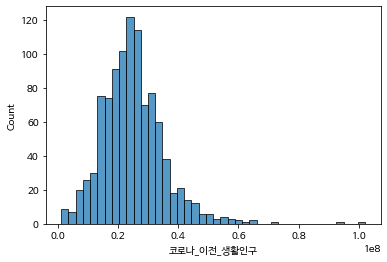

In [55]:
sns.histplot(pop_corona['코로나_이전_생활인구'])

In [59]:
bef_std = (pop_corona['코로나_이전_생활인구'] - pop_corona['코로나_이전_생활인구'].mean())/pop_corona['코로나_이전_생활인구'].std()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


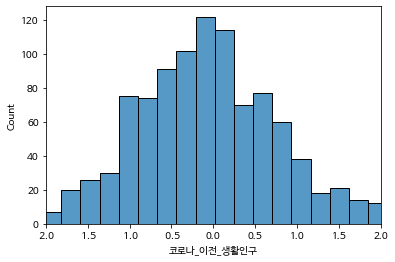

In [70]:
#표준화시켜서 분포를 살펴보면

plt.xlim(-2, 2)
sns.histplot(bef_std)

In [79]:
skew(bef_std)

1.2652626131141786

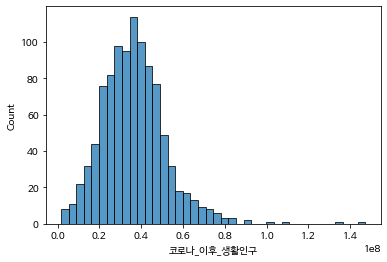

In [56]:
sns.histplot(pop_corona['코로나_이후_생활인구'])

In [65]:
aft_std = (pop_corona['코로나_이후_생활인구'] - pop_corona['코로나_이후_생활인구'].mean())/pop_corona['코로나_이후_생활인구'].std()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


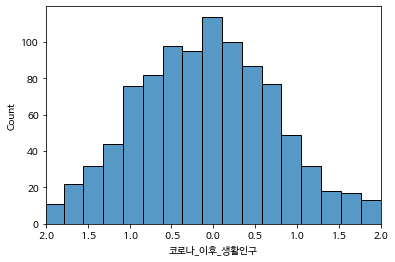

In [69]:
#표준화시켜서 분포를 확인해보기

plt.xlim(-2,2)
sns.histplot(aft_std)

In [77]:
skew(aft_std)

1.1494185189923436

##2-8-1) 정규성 검정

In [82]:
#shapiro test

bef_stat,bef_p_val = shapiro(pop_corona['코로나_이전_생활인구'])

aft_stat,aft_p_val = shapiro(pop_corona['코로나_이후_생활인구'])

In [83]:
bef_p_val

5.471243990064219e-20

In [84]:
aft_p_val

1.5027060349981598e-18

((array([-3.20045713, -2.93546521, -2.78760269, ...,  2.78760269,
          2.93546521,  3.20045713]),
  array([  1055091,   1870853,   2116464, ...,  72883924,  94814596,
         102192327])),
 (10194189.110654216, 24946139.16138614, 0.9678778972569527))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


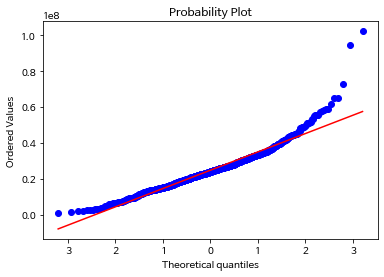

In [115]:
##qq-plot
probplot(pop_corona['코로나_이전_생활인구'],dist = stats.norm,plot=plt)

((array([-3.20045713, -2.93546521, -2.78760269, ...,  2.78760269,
          2.93546521,  3.20045713]),
  array([  1669376,   2574471,   3249956, ..., 110381177, 133808900,
         147248894])),
 (14984644.921831224, 36440315.38217822, 0.9723018193069741))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


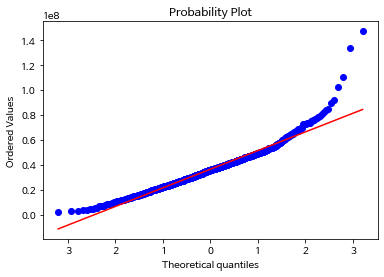

In [116]:
probplot(pop_corona['코로나_이후_생활인구'],dist = stats.norm,plot=plt)

##2-8-2)생활인구 변수의 차이에 대한 정규성 검정

In [95]:
bef_aft_minus = pop_corona['코로나_이전_생활인구'] - pop_corona['코로나_이후_생활인구']

In [96]:
shapiro(bef_aft_minus)

(0.9729582071304321, 8.976862222315196e-13)

In [100]:
bef_aft_minus_std = (bef_aft_minus - bef_aft_minus.mean())/bef_aft_minus.std()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


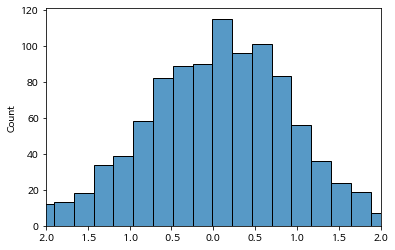

In [102]:
plt.xlim(-2,2)
sns.histplot(bef_aft_minus_std)

In [98]:
skew(bef_aft_minus)

-0.6784659443042297

((array([-3.20045713, -2.93546521, -2.78760269, ...,  2.78760269,
          2.93546521,  3.20045713]),
  array([-45056567, -45020467, -38994304, ...,   6618909,   9502629,
           9752020])),
 (6364135.486438607, -11494176.22079208, 0.985754619307987))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


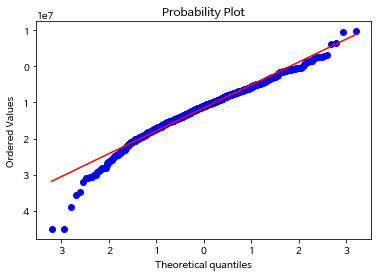

In [117]:
##q-q plot

probplot(bef_aft_minus,dist = stats.norm,plot=plt)

##2-8-3) 코로나 이전 생활인구와 코로나 이후 생활인구의 독립성 검정

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


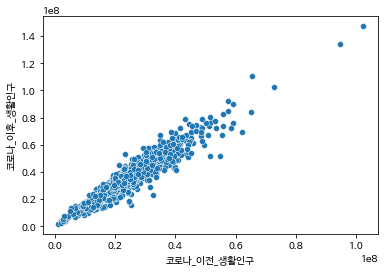

In [128]:
sns.scatterplot(pop_corona['코로나_이전_생활인구'],pop_corona['코로나_이후_생활인구'])

In [129]:
np.corrcoef(pop_corona['코로나_이전_생활인구'],pop_corona['코로나_이후_생활인구'])[0,1]

0.9449346138005483

In [130]:
#상관계수, p-value
pearsonr(pop_corona['코로나_이전_생활인구'],pop_corona['코로나_이후_생활인구'])

(0.9449346138005489, 0.0)

##2-8-3) paired t-test의 비모수적 검정인 윌콕슨 부호순위 검정

In [138]:
wilcoxon(pop_corona['코로나_이전_생활인구'],pop_corona['코로나_이후_생활인구'],alternative='greater')

WilcoxonResult(statistic=1785.0, pvalue=1.0)

In [139]:
pop_corona['코로나_이전_생활인구'].mean()

24946139.16138614

In [140]:
pop_corona['코로나_이후_생활인구'].mean()

36440315.38217822

In [141]:
wilcoxon(pop_corona['코로나_이전_생활인구'],pop_corona['코로나_이후_생활인구'],alternative='less')

WilcoxonResult(statistic=1785.0, pvalue=7.701752626048529e-165)

##2-9)코로나 이전과 코로나 이후 매출액 비교

In [144]:
money_corona = bef_aft_corona[['코로나_이전_연매출액','코로나_이후_연매출액']]

In [146]:
money_corona.head()

,코로나_이전_연매출액,코로나_이후_연매출액
60,2.344863e+11,2.046789e+11
140,4.461257e+11,3.895316e+11
285,1.093200e+12,7.847786e+11
389,6.468391e+10,4.284121e+10
432,5.831551e+10,3.848220e+10


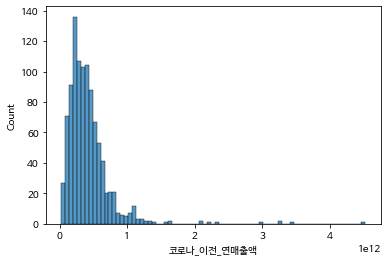

In [148]:
sns.histplot(money_corona['코로나_이전_연매출액'])

In [150]:
bef_money_std = (money_corona['코로나_이전_연매출액'] - money_corona['코로나_이전_연매출액'].mean())/money_corona['코로나_이전_연매출액'].std()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


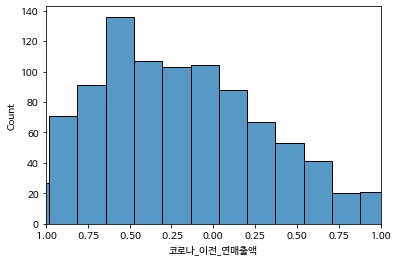

In [152]:
plt.xlim(-1, 1)
sns.histplot(bef_money_std)

In [153]:
skew(bef_money_std)

4.72883599856043

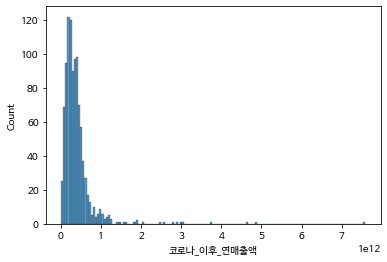

In [149]:
sns.histplot(money_corona['코로나_이후_연매출액'])

In [154]:
aft_money_std = (money_corona['코로나_이후_연매출액'] - money_corona['코로나_이후_연매출액'].mean())/money_corona['코로나_이후_연매출액'].std()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


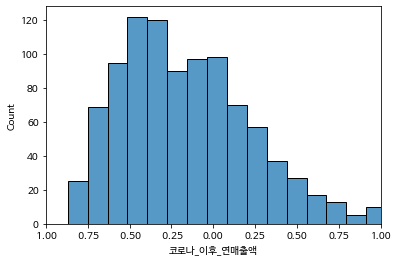

In [155]:
plt.xlim(-1, 1)
sns.histplot(aft_money_std)

In [156]:
skew(aft_money_std)

7.694023266826485

##2-9-1)정규성 검정

In [157]:
bef_stat,bef_p_val = shapiro(money_corona['코로나_이전_연매출액'])

aft_stat,aft_p_val = shapiro(money_corona['코로나_이후_연매출액'])

In [158]:
bef_p_val

1.3601143024583107e-40

In [159]:
aft_p_val

0.0

((array([-3.20045713, -2.93546521, -2.78760269, ...,  2.78760269,
          2.93546521,  3.20045713]),
  array([2.27993174e+10, 2.37922625e+10, 2.84747154e+10, ...,
         3.25580246e+12, 3.41779165e+12, 4.52393288e+12])),
 (281877419357.2199, 420293172959.0465, 0.8129941055937906))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


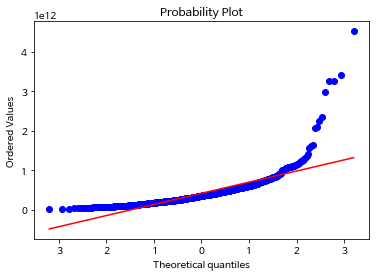

In [160]:
probplot(money_corona['코로나_이전_연매출액'],dist = stats.norm,plot=plt)

((array([-3.20045713, -2.93546521, -2.78760269, ...,  2.78760269,
          2.93546521,  3.20045713]),
  array([9.56632381e+09, 2.22622036e+10, 2.50611181e+10, ...,
         4.64322829e+12, 4.85872480e+12, 7.59052217e+12])),
 (310453556527.0889, 397080429505.8, 0.6944165152062325))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


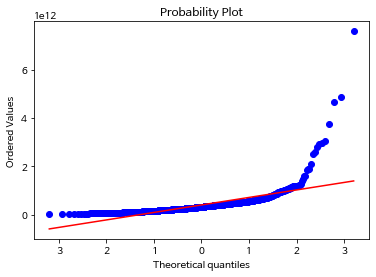

In [161]:
probplot(money_corona['코로나_이후_연매출액'],dist = stats.norm,plot=plt)

##2-9-2)두 매출액 차이에 대한 정규성 검정

In [162]:
bef_aft_money_minus = money_corona['코로나_이전_연매출액'] - money_corona['코로나_이후_연매출액']

In [163]:
shapiro(bef_aft_money_minus)

(0.46050047874450684, 0.0)

In [164]:
bef_aft_money_minus_std = (bef_aft_money_minus - bef_aft_money_minus.mean())/bef_aft_money_minus.std()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


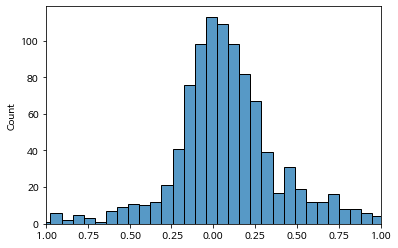

In [169]:
plt.xlim(-1,1)
sns.histplot(bef_aft_money_minus_std)

In [168]:
skew(bef_aft_money_minus)

-6.879729663395938

((array([-3.20045713, -2.93546521, -2.78760269, ...,  2.78760269,
          2.93546521,  3.20045713]),
  array([-3.06658929e+12, -2.07886965e+12, -1.44093314e+12, ...,
          7.71358245e+11,  9.87921883e+11,  9.89715657e+11])),
 (132378125559.61508, 23212743453.24653, 0.6738905398078571))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


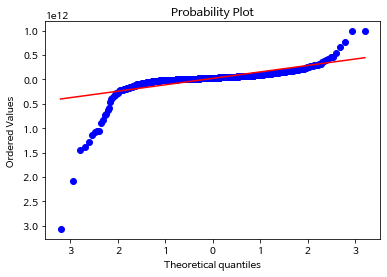

In [167]:
##q-q plot

probplot(bef_aft_money_minus,dist = stats.norm,plot=plt)

##2-9-3)코로나 이전 매출액과 코로나 이후 매출액의 독립성 검정

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


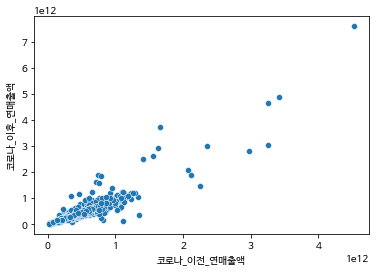

In [170]:
sns.scatterplot(money_corona['코로나_이전_연매출액'],money_corona['코로나_이후_연매출액'])

In [171]:
np.corrcoef(money_corona['코로나_이전_연매출액'],money_corona['코로나_이후_연매출액'])[0,1]

0.9080140116052448

In [172]:
pearsonr(money_corona['코로나_이전_연매출액'],money_corona['코로나_이후_연매출액'])

(0.9080140116052446, 0.0)

##2-9-4) 연매출액에 대한 윌콕슨 부호순위 검정

In [173]:
wilcoxon(money_corona['코로나_이전_연매출액'],money_corona['코로나_이후_연매출액'],alternative='greater')

WilcoxonResult(statistic=405789.0, pvalue=1.5124943137748429e-59)

In [174]:
money_corona['코로나_이전_연매출액'].mean()

420293172959.0465

In [175]:
money_corona['코로나_이후_연매출액'].mean()

397080429505.8